In [31]:
# Dogs vs Cats - Methode Perceptron Multicouche
# Author : Naoto Lucas

from sklearn.neural_network import MLPClassifier

import os, cv2, random
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline 
import pandas as pd

In [32]:
TRAIN_DIR = 'train/'
TEST_DIR = 'test/'

ROWS = 64
COLS = 64
CHANNELS = 3

train_images = [TRAIN_DIR+i for i in os.listdir(TRAIN_DIR)] # use this for full dataset
train_dogs =   [TRAIN_DIR+i for i in os.listdir(TRAIN_DIR) if 'dog' in i]
train_cats =   [TRAIN_DIR+i for i in os.listdir(TRAIN_DIR) if 'cat' in i]

test_images =  [TEST_DIR+i for i in os.listdir(TEST_DIR)]


# slice datasets for memory efficiency on Kaggle Kernels, delete if using full dataset
#train_images = train_dogs[:1000] + train_cats[:1000]
#random.shuffle(train_images)
#test_images =  test_images[:25]

def read_image(file_path):
    img = cv2.imread(file_path, cv2.IMREAD_GRAYSCALE) #cv2.IMREAD_GRAYSCALE
    return cv2.resize(img, (ROWS, COLS), interpolation=cv2.INTER_CUBIC)


def prep_data(images):
    count = len(images)
    data = np.ndarray((count, CHANNELS, ROWS, COLS), dtype=np.uint8)
    #data = np.ndarray((count, ROWS*COLS))
    
    for i, image_file in enumerate(images):
        image = read_image(image_file)
        data[i] = image.T
        #data[i] = np.squeeze(np.asarray(image.T.flatten()))
        if i%250 == 0: print('Processed {} of {}'.format(i, count))
    
    return data

def prep_data2(images):
    count = len(images)
    #data = np.ndarray((count, CHANNELS, ROWS, COLS), dtype=np.uint8)
    data = np.ndarray((count, ROWS*COLS))
    
    for i, image_file in enumerate(images):
        image = read_image(image_file)
        #data[i] = image.T
        data[i] = np.squeeze(np.asarray(image.T.flatten()))
        if i%250 == 0: print('Processed {} of {}'.format(i, count))
    
    return data

train = prep_data2(train_images)
test = prep_data2(test_images)

print("Train shape: {}".format(train.shape))
print("Test shape: {}".format(test.shape))

Processed 0 of 24777
Processed 250 of 24777
Processed 500 of 24777
Processed 750 of 24777
Processed 1000 of 24777
Processed 1250 of 24777
Processed 1500 of 24777
Processed 1750 of 24777
Processed 2000 of 24777
Processed 2250 of 24777
Processed 2500 of 24777
Processed 2750 of 24777
Processed 3000 of 24777
Processed 3250 of 24777
Processed 3500 of 24777
Processed 3750 of 24777
Processed 4000 of 24777
Processed 4250 of 24777
Processed 4500 of 24777
Processed 4750 of 24777
Processed 5000 of 24777
Processed 5250 of 24777
Processed 5500 of 24777
Processed 5750 of 24777
Processed 6000 of 24777
Processed 6250 of 24777
Processed 6500 of 24777
Processed 6750 of 24777
Processed 7000 of 24777
Processed 7250 of 24777
Processed 7500 of 24777
Processed 7750 of 24777
Processed 8000 of 24777
Processed 8250 of 24777
Processed 8500 of 24777
Processed 8750 of 24777
Processed 9000 of 24777
Processed 9250 of 24777
Processed 9500 of 24777
Processed 9750 of 24777
Processed 10000 of 24777
Processed 10250 of 24

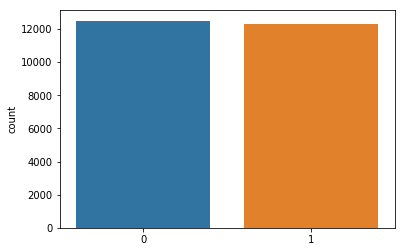

In [33]:
labels = []
for i in train_images:
    if 'dog' in i:
        labels.append(1)
    else:
        labels.append(0)

sns.countplot(labels)
#sns.plt.title('Cats and Dogs')

In [34]:
model = MLPClassifier()
model.fit(train, labels) 

MLPClassifier(activation='relu', alpha=0.0001, batch_size='auto', beta_1=0.9,
       beta_2=0.999, early_stopping=False, epsilon=1e-08,
       hidden_layer_sizes=(100,), learning_rate='constant',
       learning_rate_init=0.001, max_iter=200, momentum=0.9,
       nesterovs_momentum=True, power_t=0.5, random_state=None,
       shuffle=True, solver='adam', tol=0.0001, validation_fraction=0.1,
       verbose=False, warm_start=False)

In [48]:
predictions = model.predict(test)
print(len(predictions))

12500


In [59]:
predictions = model.predict_proba(test)
print(len(predictions.flatten()))


25000


In [39]:
score = model.score(train, labels)
print(score)

0.578157161884


In [41]:

testImage = prep_data(test_images)

for i in range(0,10):
    if predictions[i] >= 0.5: 
        print('I am {:.2%} sure this is a Dog'.format(predictions[i]))
    else: 
        print('I am {:.2%} sure this is a Cat'.format(1-predictions[i]))
        
    plt.imshow(testImage[i].T)
    plt.show()

Processed 0 of 12500
Processed 250 of 12500
Processed 500 of 12500
Processed 750 of 12500
Processed 1000 of 12500
Processed 1250 of 12500
Processed 1500 of 12500
Processed 1750 of 12500
Processed 2000 of 12500
Processed 2250 of 12500
Processed 2500 of 12500
Processed 2750 of 12500
Processed 3000 of 12500
Processed 3250 of 12500
Processed 3500 of 12500
Processed 3750 of 12500
Processed 4000 of 12500
Processed 4250 of 12500
Processed 4500 of 12500
Processed 4750 of 12500
Processed 5000 of 12500
Processed 5250 of 12500
Processed 5500 of 12500
Processed 5750 of 12500
Processed 6000 of 12500
Processed 6250 of 12500
Processed 6500 of 12500
Processed 6750 of 12500
Processed 7000 of 12500
Processed 7250 of 12500
Processed 7500 of 12500
Processed 7750 of 12500
Processed 8000 of 12500
Processed 8250 of 12500
Processed 8500 of 12500
Processed 8750 of 12500
Processed 9000 of 12500
Processed 9250 of 12500
Processed 9500 of 12500
Processed 9750 of 12500
Processed 10000 of 12500
Processed 10250 of 12

ValueError: The truth value of an array with more than one element is ambiguous. Use a.any() or a.all()

In [65]:
#Submission File
p = predictions.flatten()
p = [p[2*i+1] for i in range (12500)]
submission = pd.DataFrame({
        "id": [i for i in range (1,12501)] ,
        "label": p
    })

submission.to_csv('submission.csv', index=False)